In [92]:
import pandas as pd

In [93]:
f = pd.read_csv("combine_data.csv", parse_dates=["datetime"], index_col="datetime")

In [94]:
f

,HomeTeamProb,AwayTeamProb,AwayTeam,HomeTeam,HomeTeamHasWon,ConsensusHomeMoneyLine,ConsensusAwayMoneyLine
datetime,,,,,,,
2019-01-02,0.671360,0.328640,DAL,CHO,False,-117.0,107.0
2019-01-02,0.421730,0.578270,MIA,CLE,False,210.0,-230.0
2019-01-02,0.724603,0.275397,ATL,WAS,True,-240.0,220.0
2019-01-02,0.536187,0.463813,NOP,BRK,True,115.0,-125.0
2019-01-02,0.552163,0.447837,ORL,CHI,False,102.0,-112.0
...,...,...,...,...,...,...,...
2022-03-27,0.347830,0.652170,GSW,WAS,True,226.0,-281.0
2022-03-27,0.766541,0.233459,MIN,BOS,True,-259.0,208.0
2022-03-27,0.755368,0.244632,LAL,NOP,True,-173.0,143.0


In [95]:
f.columns

Index(['HomeTeamProb', 'AwayTeamProb', 'AwayTeam', 'HomeTeam',
       'HomeTeamHasWon', 'ConsensusHomeMoneyLine', 'ConsensusAwayMoneyLine'],
      dtype='object')

In [96]:
results = ((f["HomeTeamProb"] > 0.5) == f["HomeTeamHasWon"])

In [ ]:
kelly = (((1 - act_win_prob) / act_win_prob) * pre_win_prob - (1 - pre_win_prob)) / (
                    (1 - act_win_prob) / act_win_prob)

In [97]:
def calc_winprob(odds):
    if odds >= 0:
        return round(100/(odds+100), 2)
    else:
        return round(1 - 100/(-odds+100), 2)

In [99]:
f.loc[:, "ActualHomeWinProb"] = f.loc[:, "ConsensusHomeMoneyLine"].apply(calc_winprob)
f.loc[:, "ActualAwayWinProb"] = f.loc[:, "ConsensusAwayMoneyLine"].apply(calc_winprob)

In [100]:
f

,HomeTeamProb,AwayTeamProb,AwayTeam,HomeTeam,HomeTeamHasWon,ConsensusHomeMoneyLine,ConsensusAwayMoneyLine,ActualHomeWinProb,ActualAwayWinProb
datetime,,,,,,,,,
2019-01-02,0.671360,0.328640,DAL,CHO,False,-117.0,107.0,0.54,0.48
2019-01-02,0.421730,0.578270,MIA,CLE,False,210.0,-230.0,0.32,0.70
2019-01-02,0.724603,0.275397,ATL,WAS,True,-240.0,220.0,0.71,0.31
2019-01-02,0.536187,0.463813,NOP,BRK,True,115.0,-125.0,0.47,0.56
2019-01-02,0.552163,0.447837,ORL,CHI,False,102.0,-112.0,0.50,0.53
...,...,...,...,...,...,...,...,...,...
2022-03-27,0.347830,0.652170,GSW,WAS,True,226.0,-281.0,0.31,0.74
2022-03-27,0.766541,0.233459,MIN,BOS,True,-259.0,208.0,0.72,0.32
2022-03-27,0.755368,0.244632,LAL,NOP,True,-173.0,143.0,0.63,0.41


In [101]:
f.loc[:, "ActualHomeWinProb"] /  f.loc[:, "ConsensusHomeMoneyLine"]

datetime
2019-01-02   -0.004615
2019-01-02    0.001524
2019-01-02   -0.002958
2019-01-02    0.004087
2019-01-02    0.004902
                ...   
2022-03-27    0.001372
2022-03-27   -0.002780
2022-03-27   -0.003642
2022-03-27   -0.003750
2022-03-27   -0.002704
Length: 4193, dtype: float64

In [102]:
f.columns

Index(['HomeTeamProb', 'AwayTeamProb', 'AwayTeam', 'HomeTeam',
       'HomeTeamHasWon', 'ConsensusHomeMoneyLine', 'ConsensusAwayMoneyLine',
       'ActualHomeWinProb', 'ActualAwayWinProb'],
      dtype='object')

In [104]:
100/146

0.684931506849315

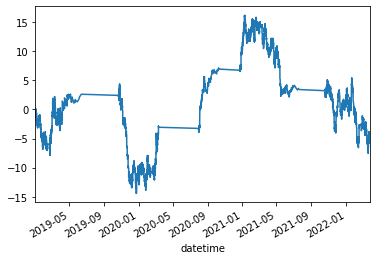

In [115]:
f.loc[:, "kellyHome"] = f.loc[:, "HomeTeamProb"].apply(lambda x: 0.2 if x<0.5 else 0)

f.loc[:, "kellyAway"] = f.loc[:, "AwayTeamProb"].apply(lambda x: 0.2 if x<0.5 else 0)

f.loc[:, "home_bet_win_result"] = f.loc[:, "HomeTeamHasWon"].apply(lambda x: 1 if x is True else 0)
f.loc[:, "home_bet_lose_result"] = f.loc[:, "HomeTeamHasWon"].apply(lambda x: 0 if x is True else 1)


f.loc[:, "away_bet_win_result"] = f.loc[:, "HomeTeamHasWon"].apply(lambda x: 0 if x is True else 1)
f.loc[:, "away_bet_lose_result"] = f.loc[:, "HomeTeamHasWon"].apply(lambda x: 1 if x is True else 0)

f.loc[:, "home_win_total"] = f.loc[:, "ConsensusHomeMoneyLine"].apply(lambda x: x/100 if x >=0 else 100/abs(x) )

f.loc[:, "away_win_total"] = f.loc[:, "ConsensusAwayMoneyLine"].apply(lambda x: x/100 if x >=0 else 100/abs(x) )
f.loc[:, "home_lose_total"] = -1

f.loc[:, "away_lose_total"] = -1

f.loc[:, "home_bet_earning"] = f.loc[:, "home_bet_win_result"] * f.loc[:, "home_win_total"] * f.loc[:, "kellyHome"] + f.loc[:, "home_bet_lose_result"] * f.loc[:, "home_lose_total"] * f.loc[:, "kellyHome"]

f.loc[:, "away_bet_earning"] = f.loc[:, "away_bet_win_result"] * f.loc[:, "away_win_total"] * f.loc[:, "kellyAway"] + f.loc[:, "away_bet_lose_result"] * f.loc[:, "away_lose_total"] * f.loc[:, "kellyAway"]

f.loc[:, "bet_earning_sum"] =  f.loc[:, "home_bet_earning"]  + f.loc[:, "away_bet_earning"]

f.loc[:, "bet_earning_cum_sum"] = f.loc[:, "bet_earning_sum"].cumsum()

f.loc[:, "bet_earning_cum_sum"].plot()



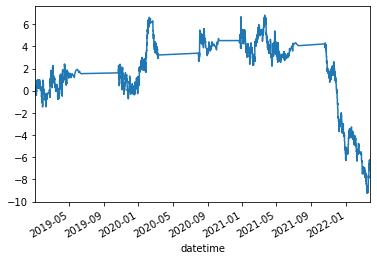

In [109]:
f.loc[:, "kellyHome"] = (((1 - f.loc[:, "ActualHomeWinProb"]) / f.loc[:, "ActualHomeWinProb"]) * f.loc[:, "HomeTeamProb"] - (1 - f.loc[:, "HomeTeamProb"])) / (
                    (1 - f.loc[:, "ActualHomeWinProb"]) / f.loc[:, "ActualHomeWinProb"])

f.loc[:, "kellyAway"] = (((1 - f.loc[:, "ActualAwayWinProb"]) / f.loc[:, "ActualAwayWinProb"]) * f.loc[:, "AwayTeamProb"] - (1 - f.loc[:, "AwayTeamProb"])) / (
                    (1 - f.loc[:, "ActualAwayWinProb"]) / f.loc[:, "ActualAwayWinProb"])



f.loc[:, "kellyHome"] = f.loc[:, "kellyHome"].apply(lambda x: x if x > 0.0 else 0)
f.loc[:, "kellyAway"] = f.loc[:, "kellyAway"].apply(lambda x: x if x > 0.0 else 0)
f.loc[:, "kellyHome"] = f.loc[:, "kellyHome"].apply(lambda x: 0.2 if x > 0.2 else x)
f.loc[:, "kellyAway"] = f.loc[:, "kellyAway"].apply(lambda x: 0.2 if x > 0.2 else x)

f.loc[:, "home_bet_win_result"] = f.loc[:, "HomeTeamHasWon"].apply(lambda x: 1 if x is True else 0)
f.loc[:, "home_bet_lose_result"] = f.loc[:, "HomeTeamHasWon"].apply(lambda x: 0 if x is True else 1)


f.loc[:, "away_bet_win_result"] = f.loc[:, "HomeTeamHasWon"].apply(lambda x: 0 if x is True else 1)
f.loc[:, "away_bet_lose_result"] = f.loc[:, "HomeTeamHasWon"].apply(lambda x: 1 if x is True else 0)

f.loc[:, "home_win_total"] = f.loc[:, "ConsensusHomeMoneyLine"].apply(lambda x: x/100 if x >=0 else 100/abs(x) )

f.loc[:, "away_win_total"] = f.loc[:, "ConsensusAwayMoneyLine"].apply(lambda x: x/100 if x >=0 else 100/abs(x) )
f.loc[:, "home_lose_total"] = -1

f.loc[:, "away_lose_total"] = -1

f.loc[:, "home_bet_earning"] = f.loc[:, "home_bet_win_result"] * f.loc[:, "home_win_total"] * f.loc[:, "kellyHome"] + f.loc[:, "home_bet_lose_result"] * f.loc[:, "home_lose_total"] * f.loc[:, "kellyHome"]

f.loc[:, "away_bet_earning"] = f.loc[:, "away_bet_win_result"] * f.loc[:, "away_win_total"] * f.loc[:, "kellyAway"] + f.loc[:, "away_bet_lose_result"] * f.loc[:, "away_lose_total"] * f.loc[:, "kellyAway"]

f.loc[:, "bet_earning_sum"] =  f.loc[:, "home_bet_earning"]  + f.loc[:, "away_bet_earning"]

f.loc[:, "bet_earning_cum_sum"] = f.loc[:, "bet_earning_sum"].cumsum()

f.loc[:, "bet_earning_cum_sum"].plot()




In [110]:
f.to_csv("result.csv")

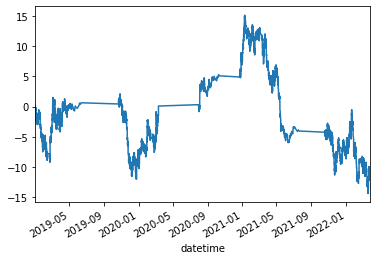

In [114]:
f.loc[:, "kellyHome"] = f.loc[:, "ConsensusHomeMoneyLine"].apply(lambda x: 0.2 if x>0 else 0)

f.loc[:, "kellyAway"] = f.loc[:, "ConsensusAwayMoneyLine"].apply(lambda x: 0.2 if x>0 else 0)

f.loc[:, "home_bet_win_result"] = f.loc[:, "HomeTeamHasWon"].apply(lambda x: 1 if x is True else 0)
f.loc[:, "home_bet_lose_result"] = f.loc[:, "HomeTeamHasWon"].apply(lambda x: 0 if x is True else 1)


f.loc[:, "away_bet_win_result"] = f.loc[:, "HomeTeamHasWon"].apply(lambda x: 0 if x is True else 1)
f.loc[:, "away_bet_lose_result"] = f.loc[:, "HomeTeamHasWon"].apply(lambda x: 1 if x is True else 0)

f.loc[:, "home_win_total"] = f.loc[:, "ConsensusHomeMoneyLine"].apply(lambda x: x/100 if x >=0 else 100/abs(x) )

f.loc[:, "away_win_total"] = f.loc[:, "ConsensusAwayMoneyLine"].apply(lambda x: x/100 if x >=0 else 100/abs(x) )
f.loc[:, "home_lose_total"] = -1

f.loc[:, "away_lose_total"] = -1

f.loc[:, "home_bet_earning"] = f.loc[:, "home_bet_win_result"] * f.loc[:, "home_win_total"] * f.loc[:, "kellyHome"] + f.loc[:, "home_bet_lose_result"] * f.loc[:, "home_lose_total"] * f.loc[:, "kellyHome"]

f.loc[:, "away_bet_earning"] = f.loc[:, "away_bet_win_result"] * f.loc[:, "away_win_total"] * f.loc[:, "kellyAway"] + f.loc[:, "away_bet_lose_result"] * f.loc[:, "away_lose_total"] * f.loc[:, "kellyAway"]

f.loc[:, "bet_earning_sum"] =  f.loc[:, "home_bet_earning"]  + f.loc[:, "away_bet_earning"]

f.loc[:, "bet_earning_cum_sum"] = f.loc[:, "bet_earning_sum"].cumsum()

f.loc[:, "bet_earning_cum_sum"].plot()

